In [1]:
from defaults import Config as defaults
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from model import Model
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
path_to_image_files = []
imagePath = 'images_ticket/'
# imagePath = 'images/'
f = []
for (dirpath, dirnames, filenames) in os.walk(imagePath):
    f.extend(filenames)
    break
for path in f:
    if path.split('.')[-1] == 'png' or path.split('.')[-1] == 'jpg':
        path_to_image_files.append(imagePath + path)


Reading model parameters from checkpoints/model.ckpt-31924


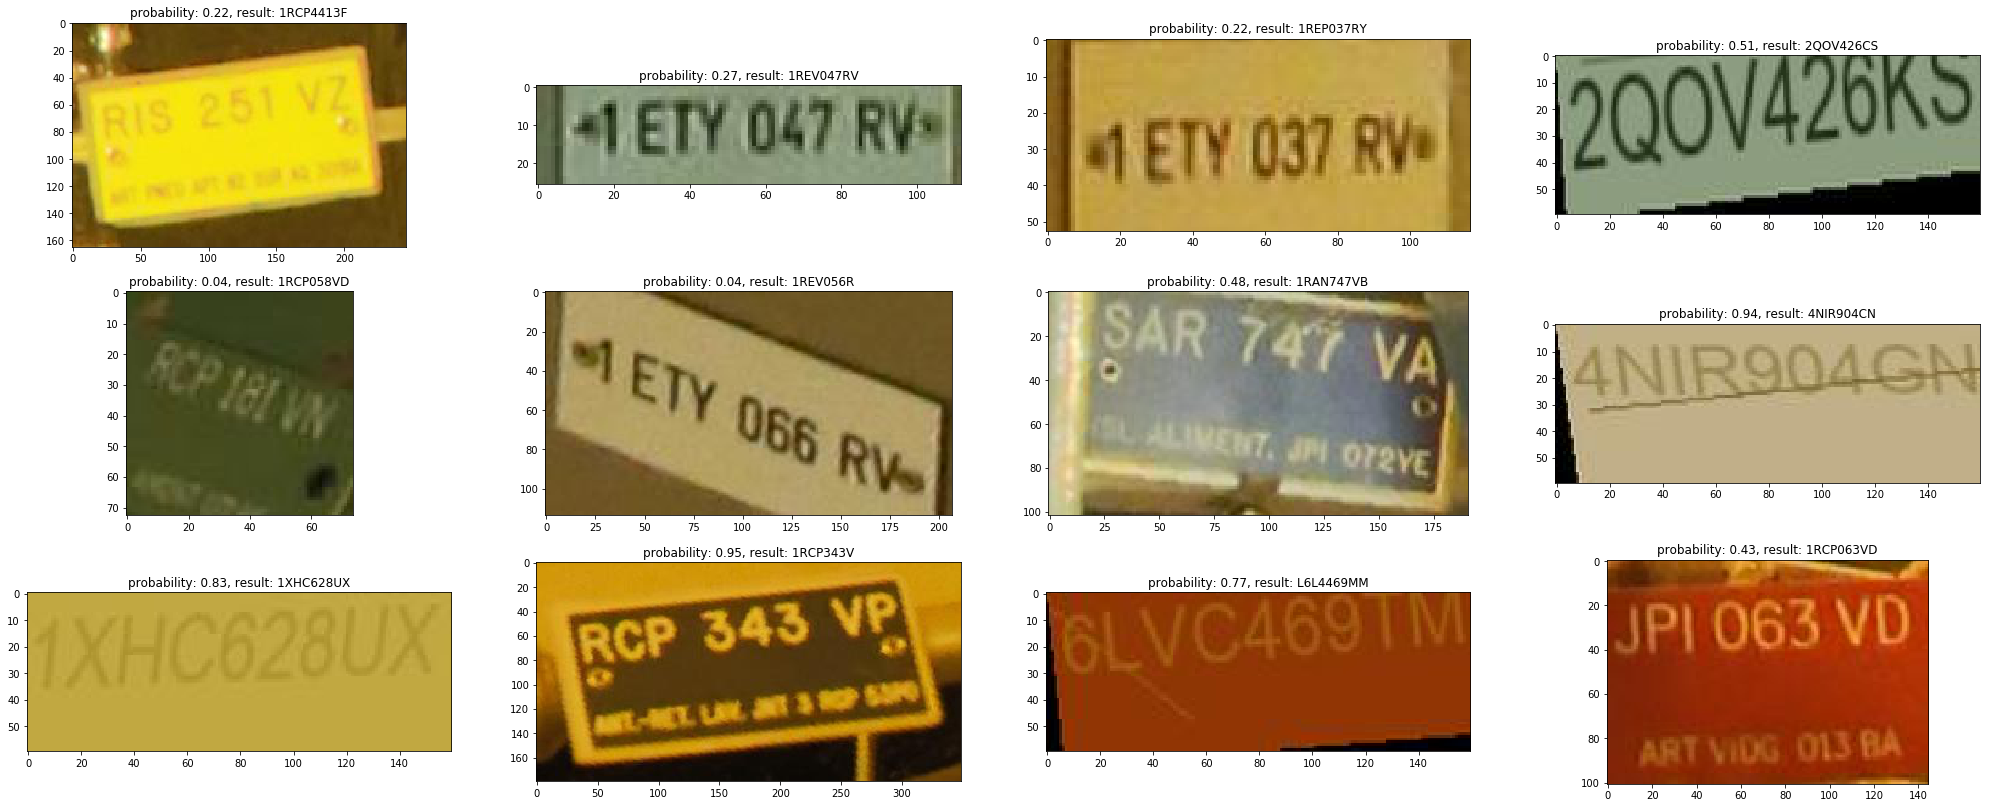

In [3]:
dataset_path = 'train_tickets.tfrecords'
num_epoch = 2
batch_size = 64
steps_per_checkpoint = 30
max_prediction_length = 13
initial_learning_rate = 1.0
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    model = Model(
        phase='predict',
        visualize=defaults.VISUALIZE,
        output_dir=defaults.OUTPUT_DIR,
        batch_size=batch_size,
        initial_learning_rate=initial_learning_rate,
        steps_per_checkpoint=steps_per_checkpoint,
        model_dir=defaults.MODEL_DIR,
        target_embedding_size=defaults.TARGET_EMBEDDING_SIZE,
        attn_num_hidden=128,
        attn_num_layers=8,
        clip_gradients=defaults.CLIP_GRADIENTS,
        max_gradient_norm=defaults.MAX_GRADIENT_NORM,
        session=sess,
        load_model=defaults.LOAD_MODEL,
        gpu_id=defaults.GPU_ID,
        use_gru=False,
        use_distance=defaults.USE_DISTANCE,
        max_image_width=defaults.MAX_WIDTH,
        max_image_height=defaults.MAX_HEIGHT,
        max_prediction_length=max_prediction_length,
        channels=1,
    )
    
    fig, axes = plt.subplots(3, 4, figsize=(35, 14))
    for i, ax in enumerate(axes.flat):
        text, probability = model.predict(open(path_to_image_files[i], 'rb').read())
        ax.set_title('probability: %.2f, result: ' % probability + str(text))
        img=mpimg.imread(path_to_image_files[i])
        ax.imshow(img)
    plt.show()